In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
# provide text file with indices of splitting

In [2]:
# read the rotated.txt 
coordinates = []
split_idx = -1
with open('rotated.txt','r') as coord_file:
    while True:
        p = coord_file.readline().strip('\n')
        if p == '':
            break
        try:
            x,y = p.split('\t')
            coordinates.append((float(x),float(y)))
        except ValueError:
            split_idx = int(p)

In [3]:
len(coordinates)

21

In [4]:
left_pupil = coordinates.pop() # last coord
right_pupil = coordinates.pop() # before last coord 

left_pupil , right_pupil

((877.8333, 480.25), (378.25, 480.25))

In [5]:
upper_right_contour = coordinates[:split_idx]
upper_left_contour = coordinates[split_idx:]

len(upper_left_contour) , len(upper_right_contour)

(9, 10)

In [12]:
def choose_best_fit_degree(contour):
    x = [c[0] for c in contour]
    y = [c[1] for c in contour]
    degree = 3
    p = np.polyfit(x,y,degree)
    return x , np.poly1d(p)

def plot_contour(right_contour,left_contour,right_pupil,left_pupil):
    if not plt.gca().yaxis_inverted():
        plt.gca().invert_yaxis()
    plt.scatter(right_pupil[0],right_pupil[1],c='b')
    plt.scatter(left_pupil[0],left_pupil[1],c='r')
    x_right,fx = choose_best_fit_degree(right_contour)
    print(f"Equation of the right eye : \n {fx}")
    x_right_new = np.linspace(min(x_right),max(x_right),100)
    y_right_new = fx(x_right_new)
    plt.plot(x_right_new,y_right_new,c='b')

    x_left,gx = choose_best_fit_degree(left_contour)
    print(f"Equation of the left eye: \n {np.poly1d(gx)}")
    x_left_new = np.linspace(min(x_left),max(x_left),100)
    y_left_new = gx(x_left_new)
    plt.plot(x_left_new,y_left_new,c='r')
    plt.show()

    # create a table to show the statistics
    mrd1_right = abs(round((fx(right_pupil[0]) - right_pupil[1])/10,2))
    print(f"MRD1 right eye : {mrd1_right} mm" )

    mrd1_left = abs(round((gx(left_pupil[0]) - left_pupil[1])/10,2))
    print(f"MRD1 left eye : {mrd1_left} mm" )

    mrd1phul_right = abs(x_right_new[np.argmax(fx(x_right_new))] - right_pupil[0])/100
    print(f"PHUL - MRD1 right_eye: {round(mrd1phul_right,2)} mm")
    mrd1phul_left = abs(x_left_new[np.argmax(gx(x_left_new))] - left_pupil[0])/100

    print(f"PHUL - MRD1 left_eye: {round(mrd1phul_left,2)} mm")

    
    print(f"Similarity between MRD1 in both eyes :{100 * min(mrd1_left,mrd1_right)/max(mrd1_right,mrd1_left):.2f} %")
    print(f"Similarity between PHUL - MRD1 in both eyes :{100 * min(mrd1phul_right,mrd1phul_left)/ max(mrd1phul_right,mrd1phul_left):.2f} %")
    


Equation of the right eye : 
             3            2
-3.346e-06 x + 0.007053 x - 3.731 x + 1047
Equation of the left eye: 
             3           2
-6.568e-06 x + 0.02205 x - 23.71 x + 8703


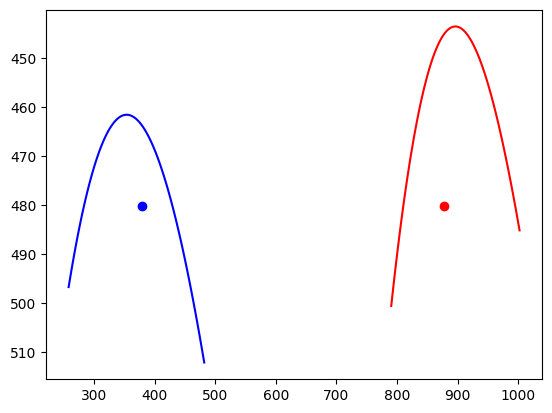

MRD1 right eye : 1.66 mm
MRD1 left eye : 3.51 mm
PHUL - MRD1 right_eye: 1.03 mm
PHUL - MRD1 left_eye: 0.87 mm
Similarity between MRD1 in both eyes :47.29 %
Similarity between PHUL - MRD1 in both eyes :84.58 %


In [13]:
plot_contour(upper_right_contour,upper_left_contour,right_pupil,left_pupil)